In [ ]:
info = {
 "title": "Baubles",
 "author": "Alex Carney",
 "github_username": "alcarney",
 "stylo_version": "0.9.0",
 "dimensions": (1080, 1080)
}

In [1]:
from math import pi
import numpy as np
import numpy.random as npr

from stylo.domain.transform import translate
from stylo.color import FillColor
from stylo.shape import Circle, Shape, Rectangle
from stylo.math import lerp
from stylo.image import LayeredImage

In [2]:
green = FillColor("005400")
red = FillColor("cc0000")
black = FillColor()
gold = FillColor("ffd700")

In [3]:
class Pattern(Shape):
    
    def __init__(self, invert=False):
        self.invert = invert
        
    def draw(self):
        
        def pattern(x, y):
            
            a = 0.1
            b = 0.05
            y = np.sin(pi/4)*x + np.cos(pi/4)*y
            
            if self.invert:
                return np.abs(y % a) > b
            
            return np.abs(y % a) < b
        
        return pattern

class Bracket(Shape):
    
    def __init__(self, scale=1):
        self.scale = scale
    
    def draw(self):
        outer_loop = Circle(y=0.03, r=0.04, fill=True)
        inner_loop = Circle(y=0.03, r=0.03, fill=True)
        
        body = Rectangle(x=0, y=0, width=0.1, height=0.05)
        
        def bracket(x, y):
            
            x = x / self.scale
            y = y / self.scale
            
            inner = np.logical_not(inner_loop(x=x, y=y))
            loop = np.logical_and(outer_loop(x=x, y=y), inner)
            
            return np.logical_or(body(x=x, y=y), loop)
        
        return bracket
    
class Pointed(Shape):
    
    def __init__(self, scale=1):
        self.scale = scale
    
    def draw(self):
        
        def pointed(x, y):
            
            x = x / self.scale
            y = y / self.scale * 2
            
            ys = y / 4
            
            above = x < 1 - ys*ys
            below = x > ys*ys - 1
            
            return np.logical_and(above, below)
            
        return pointed
    
class Curve(Shape):
    
    def __init__(self, mask, x=0, y=0, scale=1, pt=0.03, flip=False, mx=0.2, my=0.3):
        self.scale = scale
        self.pt = pt
        self.mask = mask
        self.x = x
        self.y = y
        self.flip = flip
        self.mx = mx
        self.my = my
    
    def draw(self):
        
        def pointed(x, y):
            
            mask = self.mask(x=(x-self.mx), y=(y-self.my))
            
            if self.flip:
                x = -x
            
            x = x / self.scale
            y = y / self.scale * 2
            
            ys = y / 4
            
            yc = ys - self.y
            xc = x - self.x
            
            above_c = xc < 1 + self.pt - yc*yc
            below_c = xc < 1 - self.pt - yc*yc
            
            curve = np.logical_and(above_c, np.logical_not(below_c))
            
            return np.logical_and(curve, mask)
            
        return pointed    
    

In [4]:
pattern = Pattern()

bauble1_x = -0.5
bauble1_y = 0.5

bauble_outline = Circle(r=0.205, fill=True) >> translate(bauble1_x, bauble1_y)
bauble = Circle(r=0.2, fill=True) >> translate(bauble1_x, bauble1_y)

bracket = Bracket() >> translate(bauble1_x, bauble1_y + 0.2)
bracket_outline = Bracket(scale=1.1) >> translate(bauble1_x, bauble1_y + 0.2)

bauble2_x = 0.5
bauble2_y = -0.6

bauble_outline2 = Circle(r=0.355, fill=True) >> translate(bauble2_x, bauble2_y)
bauble2 = Circle(r=0.35, fill=True) >> translate(bauble2_x, bauble2_y)

bracket2 = Bracket() >> translate(bauble2_x, bauble2_y + 0.35)
bracket_outline2 = Bracket(scale=1.1) >> translate(bauble2_x, bauble2_y + 0.35)

pointed = Pointed(scale=0.2) >> translate(0.2, 0.3)
pointed_outline = Pointed(scale=0.205) >> translate(0.2, 0.3)

pointed2 = Pointed(scale=0.2) >> translate(-0.6, -0.3)
pointed_outline2 = Pointed(scale=0.205) >> translate(-0.6, -0.3)

curve = Curve(pointed, x=1, scale=0.2)
curve1 = Curve(pointed, x=1, y=0.3, scale=0.2)
curve2 = Curve(pointed, x=1, y=-0.3, scale=0.2)
curve3 = Curve(pointed, x=1, y=-0.6, scale=0.2)
curve9 = Curve(pointed, x=1, y=-0.9, scale=0.2)

curve4 = Curve(pointed, x=-1, scale=0.2, flip=True)
curve5 = Curve(pointed, x=-1, y=0.3, scale=0.2, flip=True)
curve6 = Curve(pointed, x=-1, y=-0.3, scale=0.2, flip=True)
curve7 = Curve(pointed, x=-1, y=-0.6, scale=0.2, flip=True)
curve8 = Curve(pointed, x=-1, y=-0.9, scale=0.2, flip=True)

curve_x = 0.2
curve_y = 0.68

curve2_x = -0.6
curve2_y = 0.08

bracket3 = Bracket() >> translate(curve_x, curve_y)
bracket_outline3 = Bracket(scale=1.1) >> translate(curve_x, curve_y)

bracket4 = Bracket() >> translate(curve2_x, curve2_y)
bracket_outline4 = Bracket(scale=1.1) >> translate(curve2_x, curve2_y)

band = Curve(pointed2, x=-1.5, y=0.3, scale=0.2, mx=-0.6, my=-0.3)
band1 = Curve(pointed2, x=-1.5, y=0.6, scale=0.2, mx=-0.6, my=-.3)
band2 = Curve(pointed2, x=-1.5, y=0.9, scale=0.2, mx=-0.6, my=-0.3)
band3 = Curve(pointed2, x=-1.5, y=1.2, scale=0.2, mx=-0.6, my=-0.3)

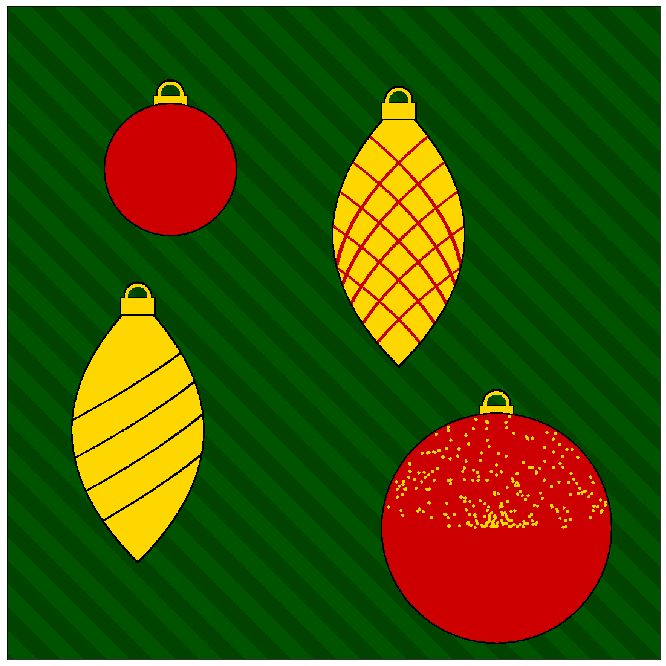

In [5]:
image = LayeredImage(background="004400")

image.add_layer(pattern, green)

image.add_layer(bracket_outline, black)
image.add_layer(bracket, gold)

image.add_layer(bauble_outline, black)
image.add_layer(bauble, red)


image.add_layer(bracket_outline2, black)
image.add_layer(bracket2, gold)

image.add_layer(bauble_outline2, black)
image.add_layer(bauble2, red)


image.add_layer(pointed_outline, black)
image.add_layer(pointed, gold)

image.add_layer(curve, red)
image.add_layer(curve1, red)
image.add_layer(curve2, red)
image.add_layer(curve3, red)

image.add_layer(curve4, red)
image.add_layer(curve5, red)
image.add_layer(curve6, red)
image.add_layer(curve7, red)
image.add_layer(curve8, red)
image.add_layer(curve9, red)
image.add_layer(bracket_outline3, black)
image.add_layer(bracket3, gold)

image.add_layer(pointed_outline2, black)
image.add_layer(pointed2, gold)
image.add_layer(band, black)
image.add_layer(band1, black)
image.add_layer(band2, black)
image.add_layer(band3, black)
image.add_layer(bracket_outline4, black)
image.add_layer(bracket4, gold)

npr.seed(128)
rs = lerp(0, .345)
ts = lerp(0, pi)

def position(r, t):
    return (0.5 + r*np.cos(t), -0.6 + r*np.sin(t))

for r, t in npr.rand(250, 2):
    x, y = position(rs(r), ts(t))
    point = Circle(x=x, y=y, r=0.005, fill=True)
    
    image.add_layer(point, gold)

image(1080, 1080)